In [2]:
NAME = "Catherine Jackson"
COLLABORATORS = ""

---

# CS110 Assignment 3 - Trie trees

**Fell free to add more cells to the ones always provided in each question to expand your answers, as needed. Make sure to refer to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1) on the grading guidelines, namely how many HC identifications and applications you are expected to include in each assignment.**

If you have any questions, do not hesitate to reach out to the TAs in the Slack channel "#cs110-algo", or come to one of your instructors' OHs.

### Submission Materials
Your assignment submission needs to include the following resources:
1. A PDF file must be the first resource and it will be created from the Jupyter notebook template provided in these instructions. Please make sure to use the same function names as the ones provided in the template. If your name is “Dumbledore”, your PDF should be named “Dumbledore.pdf”.
2. Your second resource must be a single Python/Jupyter Notebook named “Dumbledore.ipynb”. You can also submit a zip file that includes your Jupyter notebook, but please make sure to name it “Dumbledore.zip” (if your name is Dumbledore!).

For details on how to create a nice PDF from a Jupyter notebook, refer again to the [CS110 course guide](https://drive.google.com/file/d/15qthc1zdBTcb7I0BhYjy0O0p186KwmG3/view?pli=1).

### HCs and LOs for this assignment
[#responsibility], [#PythonProgramming], [#CodeReadability], [#DataStructures], [#ComplexityAnalysis], [#ComputationalCritique]

## Question 0

Take a screenshot of your CS110 dashboard on Forum where the following is visible:
* your name.
* your absences for the course have been set to excused up to the end of week 10 (inclusively).

This will be evidence that you have submitted acceptable pre-class and make-up work
for a CS110 session you may have missed. Check the specific CS110 make-up and
pre-class policies in the syllabus of the course.

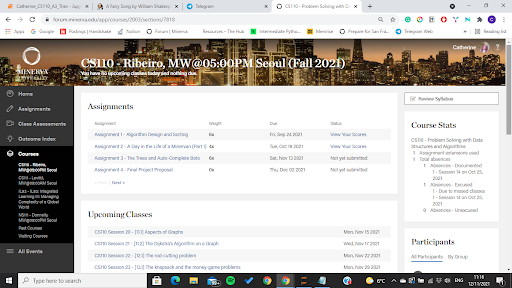

## Overview

Auto-completion functionalities are now ubiquitous in search engines, document editors, and messaging apps. How would you go about developing an algorithmic strategy from scratch to implement these computational solutions? In this assignment, you will learn about a new data structure and use it to build a very simple auto-complete engine. Each question in the assignment guides you closer to that objective while encouraging you to contrast this novel data structure to the other ones we have discussed in class.

A [trie tree](https://en.wikipedia.org/wiki/Trie), or a prefix tree, is a common data structure that stores a set of strings in a collection of nodes so that all strings with a common prefix are found in the same branch of the tree. Each node is associated with a letter, and as you traverse down the tree, you pick up more letters, eventually forming a word. Complete words are commonly found on the leaf nodes. However, some inner nodes can also mark full words.

Let’s use an example diagram to illustrate several important features of tries:

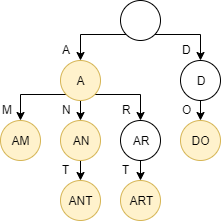

- Nodes that mark valid words are marked in yellow. Notice that while all leaves are considered valid words, only some inner nodes contain valid words, while some remain only prefixes to valid words appearing down the branch.

- The tree does not have to be balanced, and the height of different branches depends on its contents.

- In our implementation, branches never merge to show common suffixes (for example, both ANT and ART end in T, but these nodes are kept separate in their respective branches). However, this is a common first line of memory optimization for tries.

- The first node contains an empty string; it “holds the tree together.”

Your task in this assignment will be to implement a functional trie tree. You will be able to insert words into a dictionary, lookup valid and invalid words, print your dictionary in alphabetical order, and suggest appropriate suffixes like an auto-complete bot.

The assignment questions will guide you through these tasks one by one. To stay safe from breaking your own code, and to reinforce the idea of code versioning, under each new question first **copy your previous (working) code**, and only then **implement the new feature**. The code skeletons provided throughout will make this easier for you at the cost of repeating some large portions of code.

## Q1: Implement a trie tree

In this question, you will write Python code that can take a set/list/tuple of strings and insert them into a trie tree and lookup whether a specific word/string is present in the trie tree.

### Q1a: Theoretical pondering

Two main approaches to building trees, you might recall from class, are making separate Tree and Node classes, or only making a Node class. Which method do you think is a better fit for trie trees, and why? **Justify your reasoning in around 100 words.** You will use your chosen approach throughout the assignment, so don't rush this question.

I will create seperate node and tree classes. By defining the attributes of each node, such as the children and parent within a seperate class, I will easily be able to extract these attributes within the tree class. This also means I can block define nodes for a single specific tree, so that each node holds it's own data, and I can easily query it's children and other necessary attributes for methods within the tree class. Furthermore, I will be able to perform methods within the node class for which we don't need the root/entire tree structure, for example to extract possible next letters for a given word (using the set of children letters). 

### Q1b: Practical implementation

In the two cells below, there are two code skeletons. Depending on your answer to Q1a, either **implement a Node and a Trie class** or **implement a Node class**. Choose the corresponding code cell and delete the other one.

For your class(es), write **insert()** and **lookup()** methods, which will insert a word into the trie tree and look it up, respectively. Use the code skeleton and examine the specifications of its docstrings to guide you on the details of inputs and outputs to each method.

If you are coding two classes, your Trie should, upon initiation, create the root Node. If you are coding a single class, use an attribute to mark the root node.

Finally, make sure that the trie can be **initiated with a wordbank as an input**. This means that a user can create a trie and feed it an initial dictionary of words at the same time (like in the tests below), which will be automatically inserted into the trie upon its creation. Likely, this will mean that your \_\_init\_\_() has to make some calls to your insert() method.

Several test cases have been provided for your convenience and these include some, but not all, possible edge cases. If the implementation is correct, your code will pass all the tests. In addition, create at least **three more tests** to demonstrate that your code is working correctly and justify why such test cases are appropriate.

In [3]:
class Node:
    """
    This class represents one node of a trie tree.
    
    Attributes
    ----------
    children: list
        None if child character at index does not exist, Node instance if it does.
    end: bool
        True if a word ends at this node.
    """

    def __init__(self):
        """
        Creates the Node instances.
        """
        self.children = [None]*35
        self.end = False
        
class Trie:
    """
    This class represents the entirety of a trie tree.
    
    Attributes
    ----------
    root: node instance
        All instances of Trie must have a define root (an instance of Node class).
    
    Methods
    -------
    dictionary(self, char)
        Retrieves index of given character in list.
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    """
    
    def __init__(self, word_list = []):
        """
        Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.root = Node()
        
        for word in word_list:
            self.insert(word)
            
    def dictionary(self, char):
        """
        Converts character to its respective index.
        
        Parameters
        ----------
        char: str
            The letter to convert to an index.
        """
        
        characters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
                      's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'á', 'é', 'ë', 'í', 'ó', 'ú', '-', '’', "'"]
        char = char.lower()
        
        # finds char in characters list, and returns its index
        for i in range(len(characters)):
            if char == characters[i]:
                return i
        
        # prints character error message if not in list of characters
        print('ERROR: character', char, 'not in dictionary')
    
    def insert(self, word):
        """
        Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        
        # initialise node to root
        marker = self.root
        
        # iterate over characters in word
        for i in range(len(word)):
            
            # retrieve index of character
            index = self.dictionary(word[i]) 
            
            # create child node at letter if not already there
            if not marker.children[index]:
                marker.children[index] = Node()
                
            # move to child node
            marker = marker.children[index]
        
        # mark final character of input word with end as True
        marker.end = True
        
        
    def lookup(self, word):
        """
        Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
        """
        
        # initialise node to root 
        marker = self.root

        # iterate over characters in input word
        for i in range(len(word)):
            
            # retrieve index of character
            index = self.dictionary(word[i])
            
            # returns false if no node present for next character
            if not marker.children[index]:
                return False
            
            # move to child node
            marker = marker.children[index] 
        
        # if successfully moved all way down word in tree, return True (= marker.end)
        return marker.end

# This is Namárië, JRRT's elvish poem written in Quenya
wordbank = "Ai! laurië lantar lassi súrinen, yéni unótimë ve rámar aldaron! Yéni ve lintë yuldar avánier mi oromardi lisse-miruvóreva Andúnë pella, Vardo tellumar nu luini yassen tintilar i eleni ómaryo airetári-lírinen. Sí man i yulma nin enquantuva? An sí Tintallë Varda Oiolossëo ve fanyar máryat Elentári ortanë, ar ilyë tier undulávë lumbulë; ar sindanóriello caita mornië i falmalinnar imbë met, ar hísië untúpa Calaciryo míri oialë. Sí vanwa ná, Rómello vanwa, Valimar! Namárië! Nai hiruvalyë Valimar. Nai elyë hiruva. Namárië!".replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").split()

trie = Trie(wordbank)
# be careful about capital letters!
assert trie.lookup('oiolossëo') == True
# this is a prefix, but also a word in itself
assert trie.lookup('an') == True
# this is a prefix, but NOT a word
assert trie.lookup('ele') == False
# not in the wordbank
assert trie.lookup('Mithrandir') == False

In [4]:
assert trie.lookup('lisse-miruvóreva') == True # testing with dash
assert trie.lookup('lau') == False # start of a longer word in tree but shouldn't return True itself
assert trie.lookup('mi') == True # word that is start of longer word
assert trie.lookup('RámAr') == True # word with capitals at the start and in middle
assert trie.lookup('i') == True # word start of longer word
assert trie.lookup('il') == False # partial word

# creating a new simple tree
test_trie = Trie()
test_trie.insert('a')
test_trie.insert('annie')
test_trie.insert('AN')
assert test_trie.lookup('a') == True
assert test_trie.lookup('annie') == True
assert test_trie.lookup('ann') == False
assert test_trie.lookup('an') == True
assert test_trie.lookup('ANNIE') == True

# creating a tree with wordbank input rather than seperate insertions
annie = ['a', 'annie', 'AN']
annie_trie = Trie(annie)
assert test_trie.lookup('a') == True
assert test_trie.lookup('annie') == True
assert test_trie.lookup('ann') == False
assert test_trie.lookup('an') == True
assert test_trie.lookup('ANNIE') == True

# creating a larger tree
maya = """You may write me down in history
With your bitter, twisted lies,
You may trod me in the very dirt
But still, like dust, I'll rise.

Does my sassiness upset you?
Why are you beset with gloom?
’Cause I walk like I've got oil wells
Pumping in my living room.

Just like moons and like suns,
With the certainty of tides,
Just like hopes springing high,
Still I'll rise.

Did you want to see me broken?
Bowed head and lowered eyes?
Shoulders falling down like teardrops,
Weakened by my soulful cries?

Does my haughtiness offend you?
Don't you take it awful hard
’Cause I laugh like I've got gold mines
Diggin’ in my own backyard.

You may shoot me with your words,
You may cut me with your eyes,
You may kill me with your hatefulness,
But still, like air, I’ll rise.

Does my sexiness upset you?
Does it come as a surprise
That I dance like I’ve got diamonds
At the meeting of my thighs?

Out of the huts of history’s shame
I rise
Up from a past that’s rooted in pain
I rise
I'm a black ocean, leaping and wide,
Welling and swelling I bear in the tide.

Leaving behind nights of terror and fear
I rise
Into a daybreak that’s wondrously clear
I rise
Bringing the gifts that my ancestors gave,
I am the dream and the hope of the slave.
I rise
I rise
I rise.""".replace('.', '').replace(',', '').replace('?', '').split()

maya_tree = Trie(maya)
assert maya_tree.lookup('i') == True
assert maya_tree.lookup('ii') == False
assert maya_tree.lookup('that’s') == True
assert maya_tree.lookup('rise') == True
assert maya_tree.lookup('swelling') == True
assert maya_tree.lookup('oceanic') == False

I have tested my code for multiple edge cases:
* With characters as part of the string, to check nodes can be created with none-letter characters (eg. dashes)
* Using the start of a word that is not a word itself, which should return False
* Using the start of a word that is a word itself, which should return True
* Testing a word with capital letters at the start and in the middle, which should still return True regardless of capitalisation
    * Inserting words with capitals
    * Lookup of words with capitals
* Single letter words
* Words with accented characters, which we should still be able to insert to the tree
* Using a word that is an extension of a shorter word, which should return True
* Creating a new tree to check the class works for reruns and that it doesn't store any variables between instances
* Creating a tree with wordbank input rather than seperate insertions

## Q2: The computational complexity of tries

Evaluate the **computational complexity of the insert() and lookup()** methods in a trie. What are the relevant variables for runtime? You might want to consider how the height of a trie is computed to start addressing this question.  Make sure to clearly explain your reasoning.

**Compare your results to** the runtime of the same operations on **a BST**. Can you think of specific circumstances where the practical runtimes of operations supported by tries are higher than for BSTs? Explain your answer. If you believe such circumstances could be common, why would someone even bother implementing a trie tree?

Considering that words are inserted in the tree down levels, with each letter a node, we may consider the height of the tree as L, the length of the longest word contained in the tree. For each word we insert into the tree, we iterate through each character, performing a set of simple operations which take O(1) constant time for each. Therefore, we can say the time complexity of insert is O(L), where L is the length of the word being inserted. Because the lookup method works in the same way, performing constant time operations for each character in the input word, it has the same time complexity O(L), where L is the length of the searched word. To be even more specific for these complexities, we can consider the best case complexity to be a singular character (eg. 'a'), in which case the time complexity would be O(1), and the worst case to be the longest word we could possibly input into our algorithms, given by W, complexity O(W). The complexity can therefore be defined by: omega(1), O(W).

In the case of a BST, both insert and search methods have time complexity O(h), where h is the height of the tree. When the tree is balanced, this will equate to O(logN) with a base of the number of characters, where N is the number of nodes in the tree, and O(N) in the worst case when all nodes lie in a single path from root to leaf: omega(logN), O(N).

Because the length of a single word will never be very large (for example, the longest word in the english language is pneumonoultramicroscopicsilicovolcanoconiosis, which is 45 characters long), the time complexity to insert and search for words in tries will not be significant. In the case of a perfectly-balanced BST, however, where the height is logarithmic, operations may be able to be done much faster (depending on the total nodes in the tree, of course). Despite this, a trie tree has many advantages: firstly, that the height, and therefore time of operations, is restricted to the length of the longest word. Furthermore, we may insert and search for many short words very efficiently (in a short time). This is primarily a cause of the children attribute of a trie, in which a parent node, in this implementation, may have up to 35 children (or even more below), allowing much more information to be stored at each level than in a BST, where a node may only have 2 children. This is so effective as the number of nodes at each level grows exponentially.

## Q3: Print a dictionary in alphabetical order.

Recall the meaning of pre-order traversal from your previous classes. On the data structure of a trie tree, pre-order traversal corresponds to an alphabetically sorted list of the words contained within (provided that your node children are sorted alphabetically).

For example, on the example trie given in the introduction, pre-order traversal would return ["A", "AM, "AN", "ANT", "AR, "ART, "D" and "DO"]. However, since we are only interested in the actual words, we would not include "D" and "AR" in our list. To that end, you will need to include an attribute for each node, storing the information about whether its content is a word or not.

Copy your existing code to the code skeleton cell below, and add a new method to it, **alphabetical_list()**. This will be version two of your autocomplete script.

The method should **return a list**, whose elements will be the words contained in the tree, in alphabetical order. On top of passing the provided test, write at least **three more tests**, and explain why they are appropriate.

**Approach choice:** Remember the two possible approaches to the problem, as we’ve seen at the start of the course: iterative or recursive. Depending on your trie implementation, one might be preferred over the other. **Justify your choice of approach** in a few sentences (~100 words).

Copy-paste your previous code and make adjustments to this "new version", so that you cannot break the old one :).

*(Notes: If you choose a recursive approach, it might be useful to implement a helper method that is not called by the user but by preorder_traversal(). Also, watch out for the [unintuitive Python behaviour](https://web.archive.org/web/20200221224620/http://effbot.org/zone/default-values.htm) if defining functions with mutable default parameter values.)*

In [5]:
class Node:
    """
    This class represents one node of a trie tree.
    
    Attributes
    ----------
    children: list
        None if child character at index does not exist, Node instance if it does.
    end: bool
        True if a word ends at this node.
    """

    def __init__(self):
        """
        Creates the Node instances.
        """
        self.children = [None]*34
        self.end = False
        
class Trie:
    """
    This class represents the entirety of a trie tree.
    
    Attributes
    ----------
    root: node instance
        All instances of Trie must have a define root (an instance of Node class).
    
    Methods
    -------
    dictionary(self, char)
        Retrieves index of given character in list.
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    to_character(self, index)
        Retrieves character at index in list.
    alpha_helper(self, node, list_of_words, word)
        Inner function creates alphabetical list of words in tree.
    alphabetical_list(self)
        Retrieves alphabetical list from alpha_helper.
    """
    
    def __init__(self, word_list = []):
        """
        Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.root = Node()
        
        for word in word_list:
            self.insert(word)
            
    def dictionary(self, char):
        """
        Converts character to its respective index.
        
        Parameters
        ----------
        char: str
            The letter to convert to an index.
        """
        
        characters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
                      's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'á', 'é', 'ë', 'í', 'ó', 'ú', '-', "'"]
        char = char.lower()
        
        # finds char in characters list, and returns its index
        for i in range(len(characters)):
            if char == characters[i]:
                return i
        
        # prints character error message if not in list of characters
        print('ERROR: character', char, 'not in dictionary')
    
    def insert(self, word):
        """
        Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        
        # initialise node to root
        marker = self.root
        
        # iterate over characters in word
        for i in range(len(word)):
            
            # retrieve index of character
            index = self.dictionary(word[i]) 
            
            # create child node at letter if not already there
            if not marker.children[index]:
                marker.children[index] = Node()
                
            # move to child node
            marker = marker.children[index]
        
        # mark final character of input word with end as True
        marker.end = True
        
        
    def lookup(self, word):
        """
        Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
        """
        
        # initialise node to root 
        marker = self.root

        # iterate over characters in input word
        for i in range(len(word)):
            
            # retrieve index of character
            index = self.dictionary(word[i])
            
            # returns false if no node present for next character
            if not marker.children[index]:
                return False
            
            # move to child node
            marker = marker.children[index] 
        
        # if successfully moved all way down word in tree, return True (= marker.end)
        return marker.end
    
    def to_character(self, index):
        """
        Returns character at index in list.
        
        Parameters
        ----------
        index: int
            Index of character to find.
            
        Returns
        -------
        str
            Character string at index.
        """
        
        characters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
                      's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'á', 'é', 'ë', 'í', 'ó', 'ú', '-', "'"]
                      
        return characters[index]
    
    def alpha_helper(self, node, list_of_words, word = ''):
        """
        Inner function, alphabetises trie tree from node.
        
        Parameters
        ----------
        node: Node
            The node from which to alphabetise the tree.
        list_of_words: lst
            Empty list to add words from tree to.
        word: str
            Keeps track of letters down path of tree.
        
        Returns
        -------
        list
            List of words from tree in alphabetical order.
        """
        
        # adds word to list if end marker True (regardless of if node has children)
        if node.end == True:
            list_of_words.append(word)
        
        # base case: node has no children, remove character from end, and return out of recursion
        if node.children.count(None) == len(node.children):
            word = word[0:-1]
            return
        
        # iterates through all children for each node 
        for index, child in enumerate(node.children):
            
            # only runs if child index has a node
            if child != None:
                
                # adds child character to word, recursive call
                word += self.to_character(index)
                self.alpha_helper(child, list_of_words, word)
                
                # removes letter added above after recursion (moved back up level of tree)
                word = word[0:-1]
        
        return list_of_words
                
    def alphabetical_list(self):
        """
        Delivers the content of the trie in alphabetical order.

        Returns
        ----------
        list
            List of strings, all words from the trie in alphabetical order.
        """
        
        # call inner function with root node (alphabetises entire tree)
        node = self.root
        return self.alpha_helper(node, [])

In [6]:
wordbank = """Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. 
Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. 
Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, 
pulvinar a vestibulum quis, facilisis vel sapien.""".replace(",", "").replace(".", "").split()

trie = Trie(wordbank)

assert trie.alphabetical_list() == ['a','ad','adipiscing','amet','aptent',
                                    'class','consectetuer','conubia',
                                    'curabitur','dapibus','dolor','duis',
                                    'elit','etiam','facilisis','hymenaeos',
                                    'inceptos','ipsum','ligula','litora',
                                    'lorem','mi','nostra','nunc','per',
                                    'pulvinar','quam','quis','sapien',
                                    'sit','sociosqu','sollicitudin','taciti',
                                    'torquent','tortor','vel','vestibulum']

In [7]:
life_centered_around = """I think with you at the center of my thoughts. Europa orbits 
Jupiter and centers Jupiter in its thoughts. Europa thinks about its day, spinning around 
that thing that is slowest to come when you want to escape. It massages its swollen feet, 
points its toes to the wall, points them back. It spun through the day while deferring the day. 
It spins with no intention to arrive, no intention to push away. Spinning shallowly it thinks 
of shallow outer space. Europa wets its ankles and is in pain. The pain orbits around Jupiter. 
Europa hurts. It spins until it forgets Jupiter and thinks of the moment it spun around someone 
who wasn't there. It's space and space smiles like a doll whose neck is the only part that turns. 
When Europa thinks of space it thinks of the year five thousand or just before the year five thousand or just 
after the year five thousand. It thinks of a star orbiting a faraway star. It writes down a date it can't 
live in and writes a diary entry where the letters orbit around letters. The spinning makes them round. 
The left side of the doll's face is spinning to arrive at its right side. It smiles from ear to ear 
as its neck becomes bright blue. A letter came from far away. A letter without an orbit. Every 
letter in it is a round fence. A bug smoothly steps over the back of another bug. Pushing forward 
a little at a time. It erects the walls it has passed behind it and spins. It presses its back 
against the thing it left behind. It goes forward.""".replace('.', '').replace(',', '').split()

lca_tree = Trie(life_centered_around)
lca_alphabetical = ['a','about','after','against','an','and','ankles','another','around','arrive',
                'as','at','away','back','becomes','before','behind','blue','bright','bug','came',
                "can't",'center','centers','come','date','day','deferring','diary','doll',"doll's",
                'down','ear','entry','erects','escape','europa','every','face','far','faraway','feet',
                'fence','five','forgets','forward','from','goes','has','hurts','i','in','intention',
                'is','it','its',"it's",'jupiter','just','left','letter','letters','like','little',
                'live','makes','massages','moment','my','neck','no','of','only','or','orbit','orbiting',
                'orbits','outer','over','pain','part','passed','points','presses','push','pushing',
                'right','round','shallow','shallowly','side','slowest','smiles','smoothly','someone',
                'space','spinning','spins','spun','star','steps','swollen','that','the','them','there',
                'thing','think','thinks','thoughts','thousand','through','time','to','toes','turns',
                'until','wall','walls','want',"wasn't",'wets','when','where','while','who','whose',
                'with','without','writes','year','you']
assert lca_tree.alphabetical_list() == lca_alphabetical

annie = 'annie a an ann annie'.split()
annie_tree = Trie(annie)
assert annie_tree.alphabetical_list() == ['a', 'an', 'ann', 'annie']

aloe = ['aloe', 'áloe', 'halo']
aloe_tree = Trie(aloe)
assert aloe_tree.alphabetical_list() == ['aloe', 'halo', 'áloe']

I have tested my code with multiple edge cases:
* Unusual characters not found in the English language (eg. á), which I have chosen to put after the English alphabet, so will appear at the end of an alphabetised list
* Repetitions of words to check that they are not printed multiple times
* Checking that prefixes that are real words are printed, but that prefixes that are not words are not printed
* Checking that 'a', for example, comes before any words beginning in a with more letters after

I have chosen to implement a recursive solution to this problem, despite that both algorithms can optimally run with the same time complexity. As discussed above, it is likely that the depth of the trie tree will not be too great, as there is a limit to the length of an individual word. Because of this, a recursive solution can easily recurse down the levels of the tree with likely very few recursive calls (ensuring it does not hit Python's max recursion limit). Furthermore, the recursive method provides an intuitive, easy-to-follow solution, and allows us (the creator and anyone reading the code) to understand the traversal down the levels of the tree. Though we require more space to perform the recursive algorithm, this is not a constraint for the trie tree application above.

## Q4: Find the k most common words in a speech.

To mathematically determine the overall connotation of a speech, you might want to compute which words are most frequently used and then run a [sentiment analysis](https://en.wikipedia.org/wiki/Sentiment_analysis). To this end, add a method to your code, **k_most_common()** that will take as an input k, an integer, and return a list of the k most common words from the dictionary within the trie. The structure of the output list should be such that each entry is a tuple, the first element being the word and the second an integer of its frequency (see docstring if you’re confused).

To complete this exercise, you don’t have to bother with resolving ties (for example, if k = 1, but there are two most common words with the same frequency, you can return either of them), but consider it an extra challenge and let us know if you believe you managed to solve it.

The test cell below downloads and preprocesses several real-world speeches, and then runs the k-most-common word analysis of them; your code should pass the tests. As usual, add at least **three more tests**, and justify why they are relevant to your code (feel free to find more speeches to start analysing too!).

Again, copy-paste your previous code and make adjustments to this "new version". The first cell has been locked to stop you from accidentally deleting the docstrings.

Completing this question well will help you to tackle Q5!

*(Hint: This task will probably require your nodes to store more information about the frequency of words inserted into the tree. One data structure that might be very useful to tackle the problem of traversing the tree and finding most common words is heaps — you are allowed to use the heapq library or another alternative for this task.)*

In [8]:
class MaxHeapq:
    """ 
    A class that implements properties and methods that support a max priority queue data structure.

    Attributes
    ----------
    heap : arr
        A Python list where key values in the max heap are stored.
    heap_size: int
        An integer counter of the number of keys present in the max heap.
    """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap = []
        self.heap_size = 0
        
    def left(self, i):
        """
        Takes the index of the parent node and returns the index of the left child node.

        Parameters
        ----------
        i: int
          Index of parent node.

        Returns
        ----------
        int
          Index of the left child node.
        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node and returns the index of the right child node.
        
        Parameters
        ----------
        i: int
            Index of parent node.

        Returns
        ----------
        int
            Index of the right child node.
        """

        return 2 * i + 2

    def parent(self, i):
        """
        Takes the index of the child node and returns the index of the parent node.
        
        Parameters
        ----------
        i: int
            Index of child node.

        Returns
        ----------
        int
            Index of the parent node.
        """

        return (i - 1)//2

    def maxk(self):     
        """
        Returns the highest key in the priority queue. 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the highest key in the priority queue

        """
        return self.heap[0]     
    
  
    def heappush(self, key):  
        """
        Insert a key into a priority queue.
        
        Parameters
        ----------
        key: int
            The key value to be inserted.

        Returns
        ----------
        None
        """
        
        # arbitrarily large value to ensure new key is pushed into heap
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue with a higher value.
        
        Parameters
        ----------
        i: int
            The index of the key to be modified.
        key: int
            The new key value.

        Returns
        ----------
        None
        """
        
        # raise error if heap value not being increased as could violate heap property
        if key < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        
        self.heap[i] = key
        
        # bubble key up tree until valid max-heap
        while i > 0 and self.heap[self.parent(i)] < self.heap[i]:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
       
    def heapify(self, i):
        """
        Creates a max heap from the index given.
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify.

        Returns
        ----------
        None
        """
        
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        
        # set largest to be left child of i if it is larger than parent heap[i]
        if l <= (self.heap_size-1) and heap[l] > heap[i]:
            largest = l
        else:
            largest = i
            
        # set largest to be right child of i if it is larger than current largest
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        
        # if either child is larger than parent, swap and recursively call function on new position
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        """
        Returns the larest key in the max priority queue and remove it from the max priority queue.
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            The max value in the heap that is extracted.
        """
        
        # throw error if no heap exists
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
            
        # largest value at root
        maxk = self.heap[0]
        
        # set first value to be current last, and remove last
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        
        self.heap_size-=1
        
        # restructure heap to maintain max-heap property
        self.heapify(0)
        
        return maxk

In [9]:
class Node:
    """
    This class represents one node of a trie tree.
    
    Attributes
    ----------
    children: list
        None if child character at index does not exist, Node instance if it does.
    end: bool
        True if a word ends at this node.
    ends: int
        Counts number of words entered ending at this node.
    """

    def __init__(self):
        """
        Creates the Node instances.
        """
        self.children = [None]*50
        self.end = False
        self.ends = 0
        
class Trie:
    """
    This class represents the entirety of a trie tree.
    
    Attributes
    ----------
    root: node instance
        All instances of Trie must have a define root (an instance of Node class).
    
    Methods
    -------
    dictionary(self, char)
        Retrieves index of given character in list.
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    to_character(self, index)
        Retrieves character at index in list.
    alpha_helper(self, node, list_of_words, word)
        Inner function creates alphabetical list of tuples of words in tree.
    alphabetical_tuples(self)
        Retrieves alphabetical list of tuples with commonality from alpha_helper.
    k_most_common(self, k)
        Retrieves k most common words in tree.
    """
    
    def __init__(self, word_list = None):
        """
        Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.root = Node()
        
        for word in word_list:
            self.insert(word)
            
    def dictionary(self, char):
        """
        Converts character to its respective index.
        
        Parameters
        ----------
        char: str
            The letter to convert to an index.
        """
        characters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
                      's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'á', 'é', 'ë', 'í', 'ó', 'ú', '-', '1', '2', '3', 
                      '4', '5', '6', '7', '8', '9', '0', "'", '—', '’', '$', '*', '%', '/']
        
        char = char.lower()
        
        # finds char in characters list, and returns its index
        for i in range(len(characters)):
            if char == characters[i]:
                return i
            
        # prints character error message if not in list of characters
        print('ERROR: character', char, 'not in dictionary')
    
    def insert(self, word):
        """
        Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """
        
        # initialise node to root
        marker = self.root
        
        # iterate over characters in word
        for i in range(len(word)):
            
            # retrieve index of character
            index = self.dictionary(word[i]) 
            
            # create child node at letter if not already there
            if not marker.children[index]:
                marker.children[index] = Node()
            
            # move to child node
            marker = marker.children[index]
        
        # mark final character of input word with end as True, add to ends
        marker.end = True
        marker.ends += 1
        
        
    def lookup(self, word):
        """
        Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
        """
        
        # initialise node to root
        marker = self.root

        # iterate over characters in input word
        for i in range(len(word)):
            
            # retrieve index of character
            index = self.dictionary(word[i])
            
            # returns false if no node present for next character
            if not marker.children[index]:
                return False
            
            # move to child node
            marker = marker.children[index] 
        
        # if successfully moved all way down word in tree, return True (= marker.end)
        return marker.end
    
    
    def to_character(self, index):
        """
        Returns character at index in list.
        
        Parameters
        ----------
        index: int
            Index of character to find.
            
        Returns
        -------
        str
            Character string at index.
        """
        
        characters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
                      's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'á', 'é', 'ë', 'í', 'ó', 'ú', '-', '1', '2', '3', 
                      '4', '5', '6', '7', '8', '9', '0', "'", '—', '’', '$', '*', '%', '/']
                      
        return characters[index]
    
    def alpha_helper(self, node, list_of_words, word = ''):
        """
        Inner function, alphabetises trie tree from node.
        
        Parameters
        ----------
        node: Node
            The node from which to alphabetise the tree.
        list_of_words: lst
            Empty list to add words from tree to.
        word: str
            Keeps track of letters down path of tree.
        
        Returns
        -------
        list
            List of words from tree in alphabetical order.
        """
        
        # adds word and key to list if end marker True (regardless of if node has children)
        if node.end == True:
            key = node.ends
            list_of_words.append((word, key))
        
        # base case: node has no children, remove character from end, and return out of recursion
        if node.children.count(None) == len(node.children):
            word = word[0:-1]
            return
        
        # iterates through all children for each node
        for index, child in enumerate(node.children):
            
            # only runs if child index has a node
            if child != None:
                
                # adds child character to word, recursive call
                word += self.to_character(index)
                self.alpha_helper(child, list_of_words, word)
                
                # removes letter added above after recursion (moved back up level of tree)
                word = word[0:-1]

        return list_of_words
                
    def alphabetical_tuples(self):
        """
        Delivers the content of the trie in alphabetical order.

        Returns
        ----------
        list
            List of tuples, all words from the trie in alphabetical order, with number of occurrences of each word.
        """
        
        # call inner function with root node (alphabetises entire tree)
        node = self.root
        return self.alpha_helper(node, [])
    
    def k_most_common(self, k):
        """
        Finds k words inserted into the trie most often.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.
        """
        
        # visit every node in tree, storing word and number of occurrences to a list/dictionary
        extracted_tuples = self.alphabetical_tuples()
        
        # return all the possible words if k is greater than the total number of words
        if k > len(extracted_tuples):
            k = len(extracted_tuples)
        
        # build max heap from information
        heap = MaxHeapq()
        for item in extracted_tuples:
            heap.heappush(item[1])
            
        most_common = []
        
        # extract k values from heap
        for i in range(k):
            max_val = heap.heappop()
            
            # retrieve heap value from list of tuples
            for t in extracted_tuples:
                if t[1] == max_val:
                    most_common.append(t)
                    
                    # remove tuple from list when moved to most common
                    extracted_tuples.remove(t)
                    break
        
        return most_common

In [10]:
# Mehreen Faruqi - Black Lives Matter in Australia: https://bit.ly/CS110-Faruqi
# John F. Kennedy - The decision to go to the Moon: https://bit.ly/CS110-Kennedy
# Martin Luther King Jr. - I have a dream: https://bit.ly/CS110-King
# Greta Thunberg - UN Climate Summit message: https://bit.ly/CS110-Thunberg
# Vaclav Havel - Address to US Congress after the fall of Soviet Union: https://bit.ly/CS110-Havel

from requests import get
speakers = ['Faruqi', 'Kennedy', 'King', 'Thunberg', 'Havel']
bad_chars = [';', ',', '.', '?', '!', '_', 
             '[', ']', ':', '“', '”', '"', '–', '-']

for speaker in speakers:
    
    # download and clean up the speech from extra characters
    speech_full = get(f'https://bit.ly/CS110-{speaker}').text
    just_text = ''.join(c for c in speech_full if c not in bad_chars)
    without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in just_text)
    just_words = [word for word in without_newlines.split(" ") if word != ""]
    
    trie = Trie(just_words)
    
    if speaker == 'Faruqi':
        Faruqi = [('the', 60), ('and', 45), ('to', 39), ('in', 37), 
                  ('of', 34), ('is', 25), ('that', 22), ('this', 21), 
                  ('a', 20), ('people', 20), ('has', 14), ('are', 13), 
                  ('for', 13), ('we', 13), ('have', 12), ('racism', 12), 
                  ('black', 11), ('justice', 9), ('lives', 9), ('police', 9)]
        assert trie.k_most_common(20) == Faruqi
    
    elif speaker == 'Kennedy':
        Kennedy = [('the', 117), ('and', 109), ('of', 93), ('to', 63), 
                   ('this', 44), ('in', 43), ('we', 43), ('a', 39), 
                   ('be', 30), ('for', 27), ('that', 27), ('as', 26), 
                   ('it', 24), ('will', 24), ('new', 22), ('space', 22), 
                   ('is', 21), ('all', 15), ('are', 15), ('have', 15), ('our', 15)]
        assert trie.k_most_common(21) == Kennedy
    
    elif speaker == 'Havel':
        Havel = [('the', 34), ('of', 23), ('and', 20), ('to', 15), 
                 ('in', 13), ('a', 12), ('that', 12), ('are', 9), 
                 ('we', 9), ('have', 8), ('human', 8), ('is', 8), 
                 ('you', 8), ('as', 7), ('for', 7), ('has', 7), ('this', 7), 
                 ('be', 6), ('it', 6), ('my', 6), ('our', 6), ('world', 6)]
        assert trie.k_most_common(22) == Havel
    
    elif speaker == 'King':
        King = [('the', 103), ('of', 99), ('to', 59), ('and', 54), ('a', 37), 
                ('be', 33), ('we', 29), ('will', 27), ('that', 24), ('is', 23), 
                ('in', 22), ('as', 20), ('freedom', 20), ('this', 20), 
                ('from', 18), ('have', 17), ('our', 17), ('with', 16), 
                ('i', 15), ('let', 13), ('negro', 13), ('not', 13), ('one', 13)]
        assert trie.k_most_common(23) == King
    
    elif speaker == 'Thunberg':
        Thunberg = [('you', 22), ('the', 20), ('and', 16), ('of', 15), 
                    ('to', 14), ('are', 10), ('is', 9), ('that', 9), 
                    ('be', 8), ('not', 7), ('with', 7), ('i', 6), 
                    ('in', 6), ('us', 6), ('a', 5), ('how', 5), ('on', 5), 
                    ('we', 5), ('all', 4), ('dare', 4), ('here', 4), 
                    ('my', 4), ('people', 4), ('will', 4)]
        assert trie.k_most_common(24) == Thunberg

In [11]:
a_fairy_song = """Over hill, over dale,
Thorough bush, thorough brier,
Over park, over pale,
Thorough flood, thorough fire!
I do wander everywhere,
Swifter than the moon's sphere;
And I serve the Fairy Queen,
To dew her orbs upon the green;
The cowslips tall her pensioners be;
In their gold coats spots you see;
Those be rubies, fairy favours;
In those freckles live their savours;
I must go seek some dewdrops here,
And hang a pearl in every cowslip's ear""".replace(';', '').replace('!', '').replace(',', '').split()

fairy_tree = Trie(a_fairy_song)
fairies_10 = [('over', 4),('the', 4),('thorough', 4),('i', 3),('in', 3),
               ('and', 2),('be', 2),('fairy', 2),('her', 2),('their', 2)]
fairies_20 = [('over', 4),('the', 4),('thorough', 4),('i', 3),('in', 3),('and', 2),('be', 2),('fairy', 2),
              ('her', 2),('their', 2),('those', 2),('a', 1),('brier', 1),('bush', 1),('coats', 1),
              ('cowslips', 1),("cowslip's", 1),('dale', 1),('dew', 1),('dewdrops', 1)]
fairies_30 = [('over', 4),('the', 4),('thorough', 4),('i', 3),('in', 3),('and', 2),('be', 2),('fairy', 2),
              ('her', 2),('their', 2),('those', 2),('a', 1),('brier', 1),('bush', 1),('coats', 1),
              ('cowslips', 1),("cowslip's", 1),('dale', 1),('dew', 1),('dewdrops', 1),('do', 1),('ear', 1),
              ('every', 1),('everywhere', 1),('favours', 1),('fire', 1),('flood', 1),('freckles', 1),
              ('go', 1),('gold', 1)]

assert fairy_tree.k_most_common(10) == fairies_10
assert fairy_tree.k_most_common(20) == fairies_20
assert fairy_tree.k_most_common(30) == fairies_30


wordbank1 = """Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. 
            Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. 
            Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, 
            pulvinar a vestibulum quis, facilisis vel sapien.""".replace(",", "").replace(".", "").split()

trie1 = Trie(wordbank1)
trie1_0 = []
trie1_1 = [('dapibus', 2)]
trie1_5 = [('dapibus', 2), ('per', 2), ('pulvinar', 2), ('quis', 2), ('sapien', 2)] 
trie1_10 = [('dapibus', 2), ('per', 2), ('pulvinar', 2), ('quis', 2), ('sapien', 2),
            ('vel', 2),('a', 1),('ad', 1),('adipiscing', 1),('amet', 1)]
trie1_37 = [('dapibus', 2), ('per', 2), ('pulvinar', 2), ('quis', 2), ('sapien', 2),
            ('vel', 2),('a', 1),('ad', 1),('adipiscing', 1),('amet', 1),('aptent', 1),
            ('class', 1),('consectetuer', 1),('conubia', 1),('curabitur', 1),('dolor', 1),
            ('duis', 1),('elit', 1),('etiam', 1),('facilisis', 1),('hymenaeos', 1),
            ('inceptos', 1),('ipsum', 1),('ligula', 1),('litora', 1),('lorem', 1),('mi', 1),
            ('nostra', 1),('nunc', 1),('quam', 1),('sit', 1),('sociosqu', 1),('sollicitudin', 1),
            ('taciti', 1),('torquent', 1),('tortor', 1),('vestibulum', 1)]

assert trie1.k_most_common(0) == trie1_0
assert trie1.k_most_common(1) == trie1_1
assert trie1.k_most_common(5) == trie1_5
assert trie1.k_most_common(10) == trie1_10
assert trie1.k_most_common(37) == trie1_37
assert trie1.k_most_common(50) == trie1_37


words = ['hi', 'hello', 'hey', 'hola']
words_tree = Trie(words)
assert words_tree.k_most_common(4) == words_tree.k_most_common(5)
assert words_tree.k_most_common(5) == [('hello', 1), ('hey', 1), ('hi', 1), ('hola', 1)]
assert words_tree.k_most_common(1) == [('hello', 1)]

I have tested my code with multiple edge cases:
* Calling with k=0, should return an empty list with no words/tuples
* Calling with k=1, should return the most common word (if there is a tie, the first most common alphabetically should be returned)
* Calling enough most common words to return those with only a single case (to check that ends is callibrated correctly)
* Calling a value of k that is greater than the number of different words in the tree (should return all the words in the tree in this case)
* Calling a value of k that is exactly the number of words in the tree (should return all the words)

## Q5: Implement an autocomplete with a Shakespearean dictionary!

Your task is to create a new **autocomplete()** method for your class, which will take a string as an input, and return another string as an output. If the string is not present in the tree, the output will be the same as the input. However, if the string is present in the tree, your task is to find the most common word to which it is a prefix and return that word instead (this can still turn out to be itself).

To make the task more interesting, use the test cell code to download and parse “The Complete Works of William Shakespeare”, and insert them into a trie. Your autocomplete should then pass the following tests. As usual, add at least **three more test cases**, and explain why they are appropriate (you can use input other than Shakespeare for them).

Make sure to include a minimum **100 word-summary critically evaluating** your autocomplete engine. How does it really work? Your critical reflection needs to specifically evaluate the role of the different data structures used by their algorithm and what is the overall complexity that the algorithm offers. Can we do better? If so, how and by how much?

*(Hint: Again, depending on how you choose to implement it, your autocomplete() might make calls to other helper methods. However, make sure that autocomplete() is the method exposed to the user in order to pass the tests.)*

*This is a thoroughly frequentist approach to the problem, which is not the only method, and in many cases not the ideal method. However, if you were tasked with implementing something like [this](https://jqueryui.com/autocomplete/) or [this](https://xdsoft.net/jqplugins/autocomplete/), it might just be enough, so let’s give it a go. Good luck!*

In [12]:
class Node:
    """
    This class represents one node of a trie tree.
    
    Attributes
    ----------
    children: list
        None if child character at index does not exist, Node instance if it does.
    end: bool
        True if a word ends at this node.
    ends: int
        Counts number of words entered ending at this node.
    """

    def __init__(self):
        """
        Creates the Node instances.
        """
        self.children = [None]*71
        self.end = False
        self.ends = 0
        
class Trie:
    """
    This class represents the entirety of a trie tree.
    
    Attributes
    ----------
    root: node instance
        All instances of Trie must have a define root (an instance of Node class).
    
    Methods
    -------
    dictionary(self, char)
        Retrieves index of given character in list.
    insert(self, word)
        Inserts a word into the trie, creating nodes as required.
    lookup(self, word)
        Determines whether a given word is present in the trie.
    to_character(self, index)
        Retrieves character at index in list.
    alpha_helper(self, node, list_of_words, word)
        Inner function creates alphabetical list of tuples of words in tree.
    alphabetical_tuples(self, start_node)
        Retrieves alphabetical list of tuples with commonality from alpha_helper.
    k_most_common(self, k, start_node)
        Retrieves k most common words in tree.
    autocomplete(self, prefix)
        Finds the most common word in the tree beginning in prefix.
    """
    
    def __init__(self, word_list = None):
        """
        Creates the Trie instance, inserts initial words if provided.
        
        Parameters
        ----------
        word_list : list
            List of strings to be inserted into the trie upon creation.
        """
        self.root = Node()
        
        for word in word_list:
            self.insert(word)
            
    def dictionary(self, char):
        """
        Converts character to its respective index.
        
        Parameters
        ----------
        char: str
            The letter to convert to an index.
        """
        characters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
                      's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'á', 'é', 'ë', 'í', 'ó', 'ú', '-', '1', '2', '3', 
                      '4', '5', '6', '7', '8', '9', '0', "'", '—', '’', '$', '*', '%', '/', ':', '‘', '(', ')',
                      'æ', '&', '“', '”', 'œ', '"', 'à', 'è', 'â', 'ç', 'î', 'ê', '`', '|', '{', '}', '\\']
        
        char = char.lower()
        
        # finds char in characters list, and returns its index
        for i in range(len(characters)):
            if char == characters[i]:
                return i
            
        # prints character error message if not in list of characters
        print('ERROR: character', char, 'not in dictionary')
    
    def insert(self, word):
        """
        Inserts a word into the trie, creating missing nodes on the go.
        
        Parameters
        ----------
        word : str
            The word to be inserted into the trie.
        """

        # initialise node to root
        marker = self.root
        
        # iterate over characters in word
        for i in range(len(word)):
            
            # retrieve index of character
            index = self.dictionary(word[i]) 
            
            # create child node at letter if not already there
            if not marker.children[index]:
                marker.children[index] = Node()
            
            # move to child node
            marker = marker.children[index]
        
        # mark final character of input word with end as True, add to ends
        marker.end = True
        marker.ends += 1
        
        
    def lookup(self, word):
        """
        Determines whether a given word is present in the trie.
        
        Parameters
        ----------
        word : str
            The word to be looked-up in the trie.
            
        Returns
        -------
        bool
            True if the word is present in trie; False otherwise.
        """
        
        # initialise node to root
        marker = self.root

        # iterate over characters in input word
        for i in range(len(word)):
            
            # retrieve index of character
            index = self.dictionary(word[i])
            
            # returns false if no node present for next character
            if not marker.children[index]:
                return False
            
            # move to child node
            marker = marker.children[index] 
        
        # if successfully moved all way down word in tree, return True (= marker.end)
        return marker.end
    
    
    def to_character(self, index):
        """
        Returns character at index in list.
        
        Parameters
        ----------
        index: int
            Index of character to find.
            
        Returns
        -------
        str
            Character string at index.
        """
        
        characters = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r',
                      's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'á', 'é', 'ë', 'í', 'ó', 'ú', '-', '1', '2', '3', 
                      '4', '5', '6', '7', '8', '9', '0', "'", '—', '’', '$', '*', '%', '/', ':', '‘', '(', ')',
                      'æ', '&', '“', '”', 'œ', '"', 'à', 'è', 'â', 'ç', 'î', 'ê', '`', '|', '{', '}', '\\']
                      
        return characters[index]
    
    def alpha_helper(self, node, list_of_words, word = ''):
        """
        Inner function, alphabetises trie tree from node.
        
        Parameters
        ----------
        node: Node
            The node from which to alphabetise the tree.
        list_of_words: lst
            Empty list to add words from tree to.
        word: str
            Keeps track of letters down path of tree.
        
        Returns
        -------
        list
            List of words from tree in alphabetical order.
        """
        
        # adds word and key to list if end marker True (regardless of if node has children)
        if node.end == True:
            key = node.ends
            list_of_words.append((word, key))
        
        # base case: node has no children, remove character from end, and return out of recursion
        if node.children.count(None) == len(node.children):
            word = word[0:-1]
            return
        
        # iterates through all children for each node
        for index, child in enumerate(node.children):
            
            # only runs if child index has a node
            if child != None:
                
                # adds child character to word, recursive call
                word += self.to_character(index)
                self.alpha_helper(child, list_of_words, word)
                
                # removes letter added above after recursion (moved back up level of tree)
                word = word[0:-1]

        return list_of_words
                
    def alphabetical_tuples(self, start_node):
        """
        Delivers the content of the trie in alphabetical order.
        
        Parameters
        ----------
        start_node: Node
            The node from which we want to alphabetise.

        Returns
        ----------
        list
            List of tuples, all words from the trie in alphabetical order, with number of occurrences of each word.
        """
        
        # call inner function with start node (alphabetises tree from node specified)
        return self.alpha_helper(start_node, [])
    
    def k_most_common(self, k, start_node):
        """
        Finds k words inserted into the trie most often.

        Parameters
        ----------
        k : int
            Number of most common words to be returned.
        start_node: Node
            The node from which we want to find the most common suffix.

        Returns
        ----------
        list
            List of tuples.
            
            Each tuple entry consists of the word and its frequency.
            The entries are sorted by frequency.
        """
        
        # visit every node in tree, storing word and number of occurrences to a list/dictionary
        extracted_tuples = self.alphabetical_tuples(start_node)
        
        # return all the possible words if k is greater than the total number of words
        if k > len(extracted_tuples):
            k = len(extracted_tuples)
        
        # build max heap from information
        heap = MaxHeapq()
        for item in extracted_tuples:
            heap.heappush(item[1])
            
        most_common = []
        
        # extract k values from heap
        for i in range(k):
            max_val = heap.heappop()
            
            # retrieve heap value from list of tuples
            for t in extracted_tuples:
                if t[1] == max_val:
                    most_common.append(t)
                    
                    # remove tuple from list when moved to most common
                    extracted_tuples.remove(t)
                    break
        
        return most_common
    
    def autocomplete(self, prefix):
        """
        Finds the most common word with the given prefix.

        Parameters
        ----------
        prefix : str
            The word part to be “autocompleted”.

        Returns
        ----------
        str
            The complete, most common word with the given prefix.
            
        Notes
        ----------
        The return value is equal to prefix if there is no valid word in the trie.
        The return value is also equal to prefix if prefix is the most common word.
        """
    
        node = self.root
        
        # iterate down tree (down characters in prefix)
        for char in prefix:
            index = self.dictionary(char)
            node = node.children[index]
            
            # returns prefix if the child node doesn't exist at any point
            if node == None:
                return prefix
            
        # accounts for scenario prefix has no children
        if node.children.count(None) == len(node.children):
            return prefix
        
        # find most common suffix
        most_common_suffix = self.k_most_common(1, node)
        
        # complete word by adding given prefix to most common suffix
        autocomplete = prefix + most_common_suffix[0][0]
        return autocomplete     

In [13]:
from requests import get
bad_chars = [';', ',', '.', '?', '!', '1', '2', '3', '4',
             '5', '6', '7', '8', '9', '0', '_', '[', ']']

SH_full = get('http://bit.ly/CS110-Shakespeare').text
SH_just_text = ''.join(c for c in SH_full if c not in bad_chars)
SH_without_newlines = ''.join(c if (c not in ['\n', '\r', '\t']) else " " for c in SH_just_text)
SH_just_words = [word for word in SH_without_newlines.split(" ") if word != ""]

SH_trie = Trie(SH_just_words)

assert SH_trie.autocomplete('hist') == 'history'
assert SH_trie.autocomplete('en') == 'enter'
assert SH_trie.autocomplete('cae') == 'caesar'
assert SH_trie.autocomplete('gen') == 'gentleman'
assert SH_trie.autocomplete('pen') == 'pen'
assert SH_trie.autocomplete('tho') == 'thou'
assert SH_trie.autocomplete('pent') == 'pentapolis'
assert SH_trie.autocomplete('petr') == 'petruchio'

In [14]:
robert_frost = '''Two roads diverged in a yellow wood, 
And sorry I could not travel both 
And be one traveler, long I stood
And looked down one as far as I could 
To where it bent in the undergrowth;

Then took the other, as just as fair,
And having perhaps the better claim,
Because it was grassy and wanted wear;
Though as for that the passing there
Had worn them really about the same,

And both that morning equally lay
In leaves no step had trodden black.
Oh, I kept the first for another day!
Yet knowing how way leads on to way,
I doubted if I should ever come back.

I shall be telling this with a sigh
Somewhere ages and ages hence:
Two roads diverged in a wood, and I
I took the one less traveled by,
And that has made all the difference.'''

clean_robert_frost = robert_frost.replace('!', '').replace(',', '').replace(';', '').replace(':', '').replace('.', '').split()
RF_trie = Trie(clean_robert_frost)
assert RF_trie.autocomplete('div') == 'diverged'
assert RF_trie.autocomplete('i') == 'i'
assert RF_trie.autocomplete('under') == 'undergrowth'
assert RF_trie.autocomplete('z') == 'z'


wordbank2 = """Lorem ipsum dolor sit amet, consectetuer adipiscing elit. Duis pulvinar. 
            Class aptent taciti sociosqu ad litora torquent per conubia nostra, per inceptos hymenaeos. 
            Nunc dapibus tortor vel mi dapibus sollicitudin. Etiam quis quam. Curabitur ligula sapien, 
            pulvinar a vestibulum quis, facilisis vel sapien.""".replace(",", "").replace(".", "").split()
trie2 = Trie(wordbank2)

assert trie2.autocomplete('lo') == 'lorem'
assert trie2.autocomplete('face') == 'face'
assert trie2.autocomplete('a') == 'a'
assert trie2.autocomplete('p') == 'per'
assert trie2.autocomplete('vestibulum') == 'vestibulum'
assert trie2.autocomplete('vestibulum') == trie2.autocomplete('vest')

flanders_field = """In Flanders fields the poppies blow
Between the crosses, row on row,
    That mark our place; and in the sky
    The larks, still bravely singing, fly
Scarce heard amid the guns below.

We are the Dead. Short days ago
We lived, felt dawn, saw sunset glow,
    Loved and were loved, and now we lie,
        In Flanders fields.

Take up our quarrel with the foe:
To you from failing hands we throw
    The torch; be yours to hold it high.
    If ye break faith with us who die
We shall not sleep, though poppies grow
        In Flanders fields.""".replace('.', '').replace(':', '').replace(';', '').replace(',', '').split()

ff_trie = Trie(flanders_field)
assert ff_trie.autocomplete('s') == 'saw'
assert ff_trie.autocomplete('f') == 'fields'
assert ff_trie.autocomplete('fields') == 'fields'
assert ff_trie.autocomplete('t') == 'the'
assert ff_trie.autocomplete('br') == 'bravely'

I have tested for multiple edge cases:
* A word (character in this) that doesn't exist in the tree, which should return the input prefix
* A character that does exist in the tree, and is the most common, so should return itself (and not a longer word)
* A prefix which has multiple endings that are just as frequent as each other, so should return the first word alphabetically
* A prefix is the the entire word (the prefix has no children), which should return the prefix itself

There are 2 steps to my autocomplete engine:
1. Iterates down the tree to find the last character of the prefix input if it exists (if the entire prefix is not present in the tree, the engine will return the prefix itself).
2. Calls k most common method from the last character of the prefix (if it exists), to find the most common suffix.

The autocomplete method uses a combination of 2 data structures to complete the task. Firstly, the trie tree, in which the words are stored. This is utilised in both step 1 and 2 above, as we iterate (for step 1), and recurse (for step 2), down the tree to follow the word. This data structure allows for the storage of relationships between nodes, and allows us to query which possible letters come next in a word. I have also used a heap in the k most common method to easily extract the most common suffixes. This is particularly useful as we need only (conveniently) extract the root of the heap to get the most common occurrence of a suffix. Though creating a heap provides the same complexity (O(NlogN)) as using an efficient sorting algorithm such as mergesort, we can extract multiple values off the top of the heap, restructuring it with only O(logN). This extra functionality allows us to easily extract the k top words, and add words to the heap if required.

The best-case complexity in this case occurs when the input prefix does not actually exist in the tree. In this scenario, we need only run the for loop, which runs for the length of the prefix. In the very best case, we may input a single character that is not a child of the root of the tree, giving a complexity O(1). In the worst case, we will run the for loop for the length of the prefix, and recursively call k most common, which moves to every node in the subtree from the final character of the prefix. In this case, all children nodes would exist at every level, creating a large number of nodes to search through:
* sum of C^i from i=0 to i=d, where C is the number of characters, and d is the depth from a particular node
* we can simplify this to (C(1-C^d))/(1-C)
* as C grows larger, the number of nodes will be best represented by C^d (the number of leaf nodes)
Therefore, the overall worst-case complexity can be given by O(C^d), where C is the number of possible characters, and d the depth from the end of the prefix. Because the runtime of searching through these nodes is exponential, we can disregard iterating through each character in the prefix.

Though the worst-case complexity of this algorithm seems bad, it is extremely unlikely that all children will always have nodes, as these words will not all exist in any language. Furthermore, the depth will likely not be too great, as there is a limit on the length of words. However, some ways we could potentially improve on this worst-case:
* Eliminate characters such as numbers, and other symbols (though this could lead to implications if they should in fact be included in the word).
* Use a node attribute for the most common word from each node. This should be updated every time a word is inserted into the tree. This would save the complexity of moving all the way through the tree when we search, as the data will be captured in insertion. This could be advantageous if we want to do many autocomplete searches on the tree.
* Use a dictionary to store the words and their number of occurrences. This would allow us to find a key/word more easily (rather than searching through a list for a match).

#### HC and LO Appendix 
* #breakitdown- Throughout the assignment, I have been able to break down larger problems into smaller, more solvable ones. For example, in question 3, in order to alphabetise the words contained within the trie tree, I have used 3 different algorithms: one retrieves the character at a particular index in the list, one performs the recursive action to move up and down branches of the tree, and a third calls this algorithm with the correct arguments. Another example is question 5, where I have utilised my functions from question 4, therefore solving a large portion of the problem using this algorithm. Breaking the autocomplete problem down in this way has allowed me to create multifunctional methods, increasing the functionality of the code I have completed. On a smaller scale, I also used #breakitdown to understand each individual question, first writing out the different steps that I would need to complete the overall challenge, then working on them one at a time (eg. the 2 steps as shown in my question 5 critical analysis). This ensured not only that I was able to solve the problems, but also that they are solved in an intuitive and understandable way for those trying to comprehend my code.
* #CodeReadibility- I have commented my code in such a manner that it is understandable (mainly commenting the potentially conplicated sections of code), but not so much that it is messy and incomprehendible. I have provided docstrings for all my classes and methods within them, detailing the overall function, the parameters, returns, methods, attributes, and any important notes. I have also included useful error messages so that the user of the code is easily able to correct their input, or so that I was able to debug my code throughout (for example, in the increase_key method in the heap class in question 4, and in the to_character method in the trie class). In question 4, when I required the alphabetising method to return the number of instances of each word in the tree and well as the word itself, I have changed the name of the method to alphabetical_tuples to reflect the change, and reduce confusion from both my and the users perspective.
* #ComplexityAnalysis- I have discussed, in question 2, the complexity of the search and lookup methods for the trie tree. I have given a detailed explanation of how these were derived, and the conclusions that I can draw about the algorithm based on these complexities. I have specified the best and worst-case complexities. Furthermore, in the final question, I have discussed the best and worst-case complexities, explaining exactly how we may derive these in a step-by-step anaylsis. I have also commented on how we may reduce this runtime (eliminating non-letter characters), but also noted the implications this may have on the effectiveness of the autocomplete engine for different applications.
* #ComputationalCritique- In question 3, I have compared the recursive and iterative solutions to retrieving an alphabetical list of all words in the tree. I have noted the advantages of both algorithms, and justified my use of a recursive solution given these factors. I have also noted the main disadvantage of recursion (space), but explained why this is not an issue in the context. Furthermore, in question 5, I have discussed the advantages and drawbacks of the algorithmic approach I have taken for my autocomplete engine. I have also criticised my algorithm, giving potential improvements that could be made (some of which are more applicable for different applications that I have specified).
* #DataStructures- I have chosen applicable data structures throughout the assignment. In question 5, for example, I have used both a trie tree structure and a max heap to execute my autocomplete function. I have justified why this approach is optimal for the problem at hand, specifying an alternative solution that would also work to complete the question, but may have some drawbacks in terms of functionality and adaptibility for other problems.
* #optimisation- In question 2, I have applied optimisation to explain why the complexities for search and lookup in this trie tree are optimal. Through discussing the runtime growth of the algorithm, we can understand that the complexities for search and lookup will be very low on average. The maximum runtime complexity, therefore, will be the longest length of a word that we could possibly input. Because the length of words is restricted for each language, as discussed, the max runtime complexity cannot exceed this length. For this reason, the algorithm is an optimal solution to the problem. Furthermore, in question 5, I have discussed the advantages of my autocomplete algorithm, and, at the end, commented on how we may optimise this algorithm even further, so that the most common word in the tree with a given prefix can be retrieved more quickly.
* #PythonProgramming- I have completed all the problems in the set, providing solutions which are clear and well-structured for others to understand. My code passes all the given tests in the notebook, as well as many other tests I have created. I have tested for many edges cases, which I have detailed below each test, making sure to note why this may cause a problem for the code. Furthermore, I have reused code in questions 4 and 5, adapting methods from the previous questions to increase functionality. The docstrings and comments allow the user to understand the function of the code, and hwo specific sections work to solve the problems.
* #utility- I have used utility to weigh up the advantages and disadvantages of different approaches to problems in this assignment, and make overall conclusions about which is better to apply. In question 3, for example, I have discussed the advantages and disadvantages of a recursive versus iterative solution. I have made these comments specifically based on the algorithm at hand, alphabetising the tree. Furthermore, I have discussed the advantages of my autocomplete algorithm in the final problem, and noted some potential improvements that could be made to the algorithm for different applications, as the conclusion of utility analysis depends on the specific application for which we require the functions.